# Planets in Binary Star Systems

*A 488 Computational Astrophysics Project by Tyler Barna<sup>1</sup>, Rachel Campo<sup>1</sup>, Jillian Mellen<sup>1</sup>, and Jonathan Zablin<sup>1</sup>*

<small><sup>1</sup>Department of Physics and Astronomy, Rutgers, the State University of New Jersey, New Brunswick</small>

## Dependencies



In [1]:
import AnimGIF as anim
import gravSolve as gs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from astropy import constants as const
from astropy import units as u
from celluloid import Camera
from matplotlib import rcParams
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'
rcParams.update({'figure.autolayout': True})

%matplotlib inline

In [2]:
def plotter(x,y,z, proj=3):
    result2=integrate.odeint(gs.df_Nbody,v0,tarr,args=(mass,))
    x1=result2[0:,0]
    y1=result2[0:,1]
    z1=result2[0:,2]

    x2=result2[0:,3]
    y2=result2[0:,4]
    z2=result2[0:,5]

    x3=result2[0:,6]
    y3=result2[0:,7]
    z3=result2[0:,8]

    vx1=result2[0:,9]
    vy1=result2[0:,10]
    vz1=result2[0:,11]

    vx2=result2[0:,12]
    vy2=result2[0:,13]
    vz2=result2[0:,14]

    vx3=result2[0:,15]
    vy3=result2[0:,16]
    vz3=result2[0:,17]
    
    
    if proj==2:
        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(111)
        if x==1:
            ax.plot(x1,y1, 'b', label="Body 1")
        if y==1:
            ax.plot(x2,y2, 'k', label="Body 2")
        if z==1:
            ax.plot(x3,y3, 'r',label="Body 3")
    if proj==3:
        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(111, projection='3d')
        if x==1:
            ax.plot(x1,y1,z1, 'b', label="Body 1")
        if y==1:
            ax.plot(x2,y2,z2, 'k', label="Body 2")
        if z==1:
            ax.plot(x3,y3,z3, 'r',label="Body 3")
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [3]:
##units used: AU, Msun, yr
G = const.G.to('AU**3/Msun*yr**2').value
M1 = 0.6
M2 = 0.0107
M3 = 0
e = 0.3300
a = 0.0326


## kepler's laws
Mtot=M1+M2
mu=M1*M2/Mtot
ell=np.sqrt(G*Mtot*a*(1.0-e**2))
P=2.0*np.pi*np.sqrt(a**3/(G*Mtot))

## set initial conditions correpsonding to apoapsis
rap=a*(1.0+e)
vap=ell/rap

## positions and velocities of the two stars
R1=rap*mu/M1
R2=rap*mu/M2
v1=vap*mu/M1
v2=vap*mu/M2


body1Pos = [R1,0,0] ##(x,y,z)
body1Velo = [0,v1,0] ##(vx,vy,vz)

body2Pos = [-R2,0,0] ##(x,y,z)
body2Velo = [0,-v2,0] ##(vx,vy,vz)

body3Pos = [0,0,0]
body3Velo = [0,0,0]
tarr=np.linspace(0.0, P, 1e4)
mass = np.array([M1,M2, M3])
pos = np.array([body1Pos, body2Pos, body3Pos]).flatten()
velo = np.array([body1Velo, body2Velo, body3Velo]).flatten()
v0 = np.array([pos, velo]).flatten()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


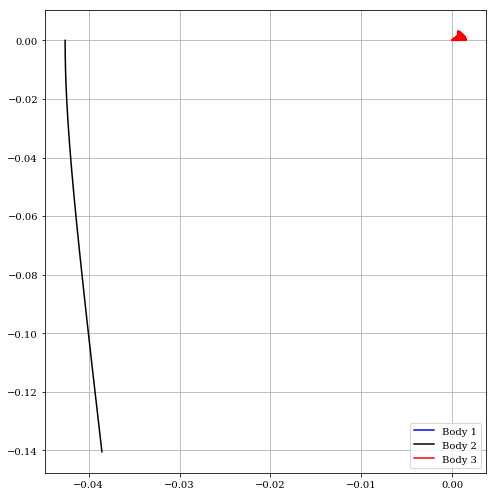

In [5]:
plotter(1,1,1,proj=2)